<a href="https://colab.research.google.com/github/Argetlam0988/Telecom-X2-Challenge/blob/main/Telecom_X2_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

# Cargamos el dataset tratado que descargamos del cuaderno anterior
# Este archivo ya no tiene nulos y tiene los formatos de datos corregidos
df = pd.read_csv("telecom_tratado.csv")

# Verificamos que la carga sea idéntica a lo que dejamos en la Etapa 1
print("✅ Datos cargados exitosamente para el Nivel 2.")
print(f"Total de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")

# Mostramos los primeros 5 registros para asegurarnos de que todo esté en orden
df.head()


✅ Datos cargados exitosamente para el Nivel 2.
Total de registros: 7032
Total de columnas: 21


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## **Eliminación de Columnas Irrelevantes**

In [ ]:
# Eliminamos la columna de identificación única.
# Nota: Si al limpiar en la Etapa 1 ya la habías quitado, este paso confirmará que no está.
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("✅ Columna 'customerID' eliminada correctamente.")
else:
    print("⚠️ La columna 'customerID' ya no existía en el archivo tratado.")

# Revisamos la lista de columnas resultantes que sí usaremos para entrenar la IA
print("Variables que usaremos para el modelo:")
print(df.columns.tolist())

✅ Columna 'customerID' eliminada correctamente.
Variables que usaremos para el modelo:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


# **Encoding (Codificación de Variables)**

In [ ]:
# Usaremos 'get_dummies' de pandas.
# Esta función crea una columna nueva por cada categoría.
# 'drop_first=True' es una técnica profesional para evitar la redundancia:
# Si sabemos que alguien NO es hombre, automáticamente sabemos que es mujer (en datos binarios).
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificamos el cambio
print(f"Número de columnas antes del Encoding: {df.shape[1]}")
print(f"Número de columnas después del Encoding: {df_encoded.shape[1]}")

# Mostramos las primeras filas para ver cómo las palabras ahora son 0 y 1
df_encoded.head()

Número de columnas antes del Encoding: 20
Número de columnas después del Encoding: 31


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.SeniorCitizen_Sí,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,9,65.6,593.30,False,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,9,59.9,542.40,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,4,73.9,280.85,True,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,13,98.0,1237.85,True,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,3,83.9,267.40,True,False,True,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


# **Verificación de la Proporción de Cancelación (Churn)**

--- Proporción de la Variable Objetivo (Churn) ---
Clientes que se quedan (0): 73.42%
Clientes que se van (1): 26.58%


/tmp/ipython-input-1479671772.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes que se quedan (0): {proporcion[0]:.2f}%")
/tmp/ipython-input-1479671772.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Clientes que se van (1): {proporcion[1]:.2f}%")
/tmp/ipython-input-1479671772.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df_encoded, palette='viridis')


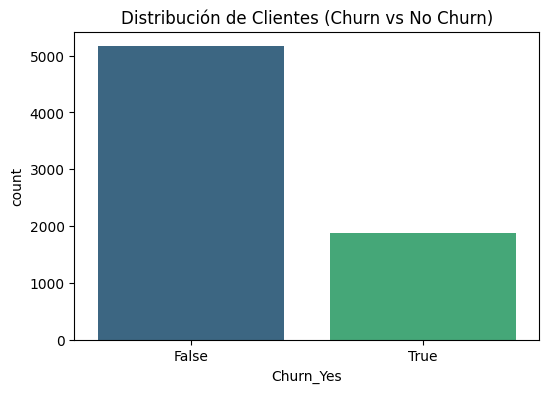

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contamos cuántos clientes hay en cada categoría de la variable objetivo 'Churn'
# Nota: Después del encoding, nuestra columna objetivo suele llamarse 'Churn_Yes'
proporcion = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100

print("--- Proporción de la Variable Objetivo (Churn) ---")
print(f"Clientes que se quedan (0): {proporcion[0]:.2f}%")
print(f"Clientes que se van (1): {proporcion[1]:.2f}%")

# Creamos un gráfico sencillo para visualizar este balance
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Yes', data=df_encoded, palette='viridis')
plt.title('Distribución de Clientes (Churn vs No Churn)')
plt.show()

# **Balanceo de Clases**

--- Proporción después del Balanceo ---
Churn_Yes
False    50.0
True     50.0
Name: proportion, dtype: float64


/tmp/ipython-input-200406828.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df_balanced, palette='magma')


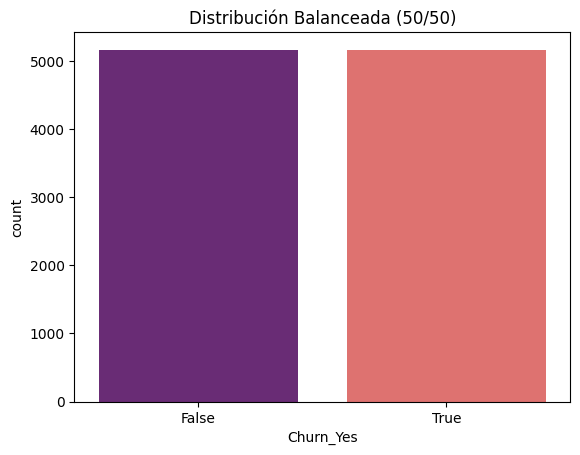

In [ ]:
from imblearn.over_sampling import SMOTE

# Separamos nuestras variables explicativas (X) de nuestra variable objetivo (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Inicializamos SMOTE
smt = SMOTE(random_state=123)

# Aplicamos el balanceo
X_res, y_res = smt.fit_resample(X, y)

# Unimos de nuevo en un DataFrame para seguir el flujo del Trello
df_balanced = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res, columns=['Churn_Yes'])], axis=1)

# Verificamos que ahora las clases están 50/50
print("--- Proporción después del Balanceo ---")
print(df_balanced['Churn_Yes'].value_counts(normalize=True) * 100)

# Graficamos el nuevo balance
sns.countplot(x='Churn_Yes', data=df_balanced, palette='magma')
plt.title('Distribución Balanceada (50/50)')
plt.show()

# **Normalización o Estandarización**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el escalador para que todos los números estén entre 0 y 1
scaler = MinMaxScaler()

# Aplicamos la normalización a todo el dataset balanceado (excepto la columna objetivo)
# Es importante no normalizar la columna 'Churn_Yes' porque ya es 0 y 1
columnas_a_escalar = df_balanced.columns.drop('Churn_Yes')
df_balanced[columnas_a_escalar] = scaler.fit_transform(df_balanced[columnas_a_escalar])

print("✅ Datos normalizados en escala de 0 a 1.")
df_balanced.head()

✅ Datos normalizados en escala de 0 a 1.


,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.SeniorCitizen_Sí,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Churn_Yes
0,0.112676,0.471144,0.066294,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False
1,0.112676,0.414428,0.060420,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2,0.042254,0.553731,0.030239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,True
3,0.169014,0.793532,0.140670,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,True
4,0.028169,0.653234,0.028687,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True


# **🎯 Correlación y Selección de Variables**

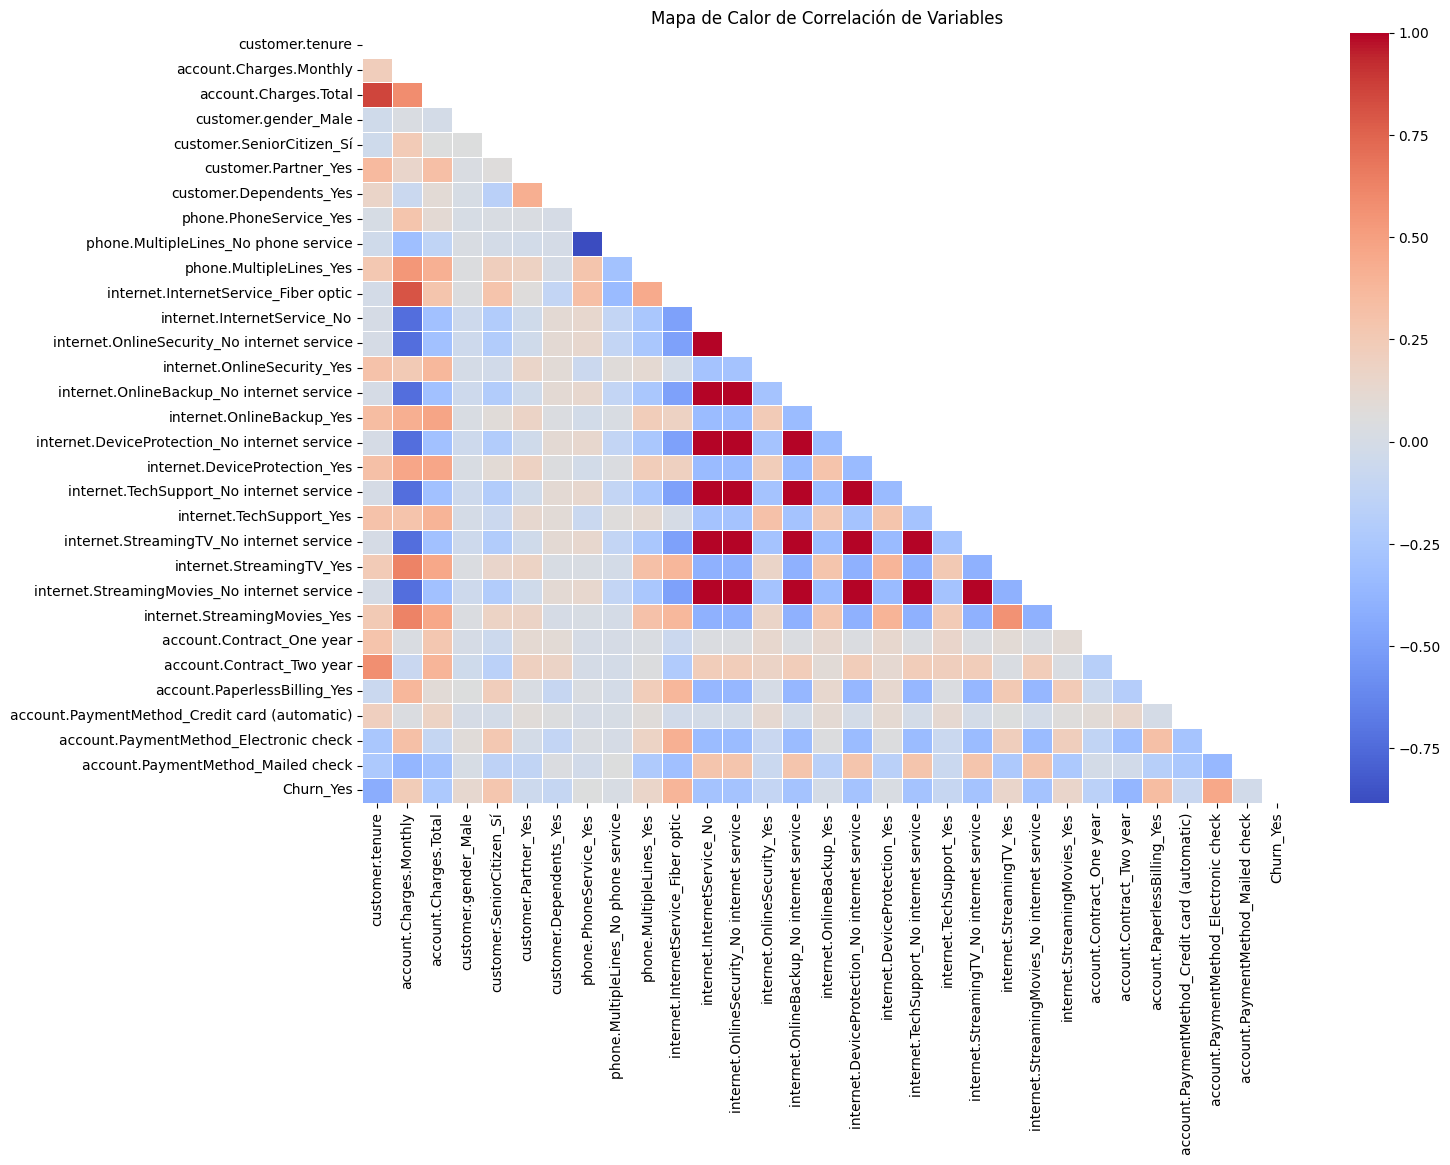

In [ ]:
import numpy as np

# Calculamos la matriz de correlación de Pearson
# Esto nos dará un número entre -1 y 1 para cada par de variables
corr = df_balanced.corr()

# Configuramos el gráfico
plt.figure(figsize=(15, 10))
# Usamos una máscara para ver solo la mitad inferior (es un espejo, no necesitamos ver ambas)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

--- Variables con mayor impacto en la Cancelación (Churn) ---
Churn_Yes                                        1.000000
account.PaymentMethod_Electronic check           0.462063
internet.InternetService_Fiber optic             0.385344
account.PaperlessBilling_Yes                     0.343257
customer.SeniorCitizen_Sí                        0.281043
account.Charges.Monthly                          0.235121
phone.MultipleLines_Yes                          0.156734
internet.StreamingTV_Yes                         0.154038
internet.StreamingMovies_Yes                     0.153111
customer.gender_Male                             0.130145
phone.PhoneService_Yes                           0.057601
internet.DeviceProtection_Yes                    0.025205
phone.MultipleLines_No phone service             0.016820
internet.OnlineBackup_Yes                       -0.001205
account.PaymentMethod_Mailed check              -0.029545
customer.Partner_Yes                            -0.053845
account.Pa

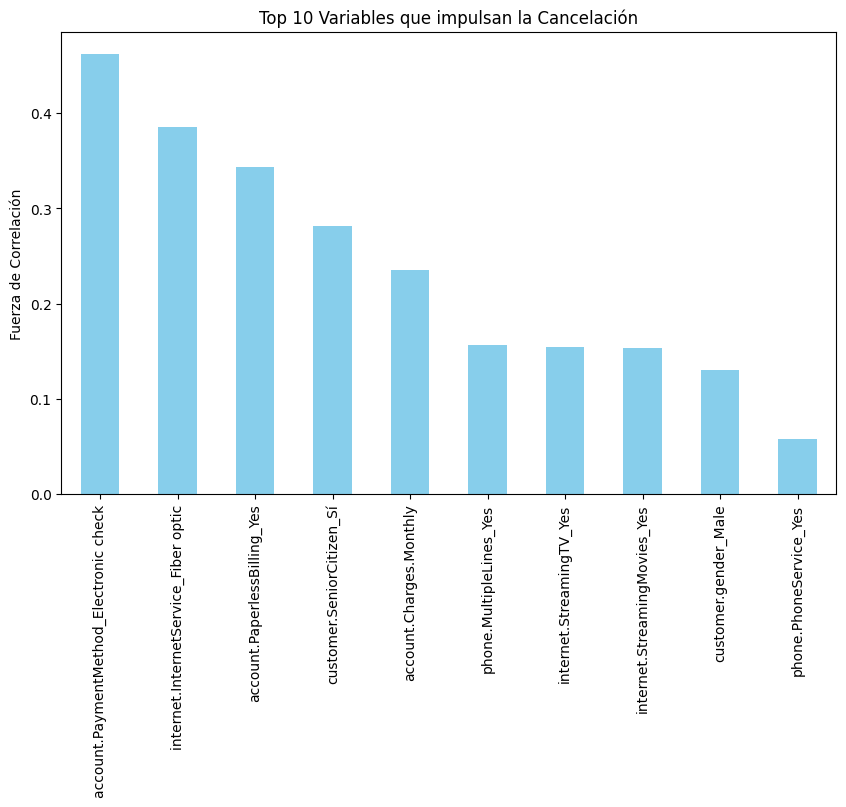

In [ ]:
# Filtramos la correlación específicamente para la columna Churn_Yes
# La ordenamos de mayor a menor para ver los impactos directos
correlacion_churn = corr['Churn_Yes'].sort_values(ascending=False)

print("--- Variables con mayor impacto en la Cancelación (Churn) ---")
print(correlacion_churn)

# Visualizamos las Top 10 variables más correlacionadas
plt.figure(figsize=(10, 6))
correlacion_churn.drop('Churn_Yes').head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Variables que impulsan la Cancelación')
plt.ylabel('Fuerza de Correlación')
plt.show()

# **🤖 Modelado Predictivo**

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos X (todas las variables explicativas) e y (lo que queremos predecir: Churn)
X = df_balanced.drop('Churn_Yes', axis=1)
y = df_balanced['Churn_Yes']

# Realizamos la división.
# random_state=123 asegura que si repites el código, la división sea siempre la misma.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"✅ Datos separados con éxito.")
print(f"Muestras para Entrenamiento: {X_train.shape[0]}")
print(f"Muestras para Prueba (Examen): {X_test.shape[0]}")

✅ Datos separados con éxito.
Muestras para Entrenamiento: 8260
Muestras para Prueba (Examen): 2066


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Modelo Dummy (Base)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

# 2. Modelo KNN (Vecinos)
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

# 3. Modelo Árbol de Decisión
arbol = DecisionTreeClassifier(criterion='entropy', random_state=123)
arbol.fit(X_train, y_train)

print("✅ Los tres modelos han sido entrenados y están listos para ser evaluados.")

✅ Los tres modelos han sido entrenados y están listos para ser evaluados.


--- RESULTADOS DE PRECISIÓN (Exactitud) ---
Precisión del Dummy: 49.08%
Precisión del KNN: 79.72%
Precisión del Árbol de Decisión: 79.57%


/tmp/ipython-input-2105243080.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=scores, palette='viridis')


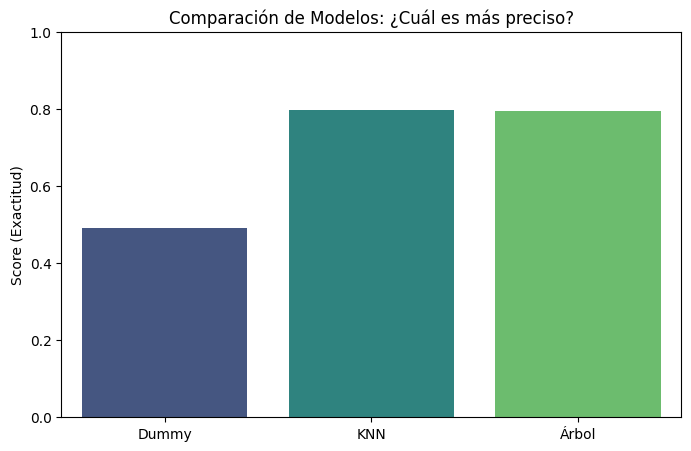

In [ ]:
# Evaluamos la exactitud (accuracy) de cada uno
score_dummy = dummy.score(X_test, y_test)
score_knn = knn.score(X_test, y_test)
score_arbol = arbol.score(X_test, y_test)

print("--- RESULTADOS DE PRECISIÓN (Exactitud) ---")
print(f"Precisión del Dummy: {score_dummy:.2%}")
print(f"Precisión del KNN: {score_knn:.2%}")
print(f"Precisión del Árbol de Decisión: {score_arbol:.2%}")

# Visualización comparativa
modelos = ['Dummy', 'KNN', 'Árbol']
scores = [score_dummy, score_knn, score_arbol]

plt.figure(figsize=(8,5))
sns.barplot(x=modelos, y=scores, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparación de Modelos: ¿Cuál es más preciso?')
plt.ylabel('Score (Exactitud)')
plt.show()

# **📋 Interpretación y Conclusiones**

/tmp/ipython-input-858486457.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='rocket')


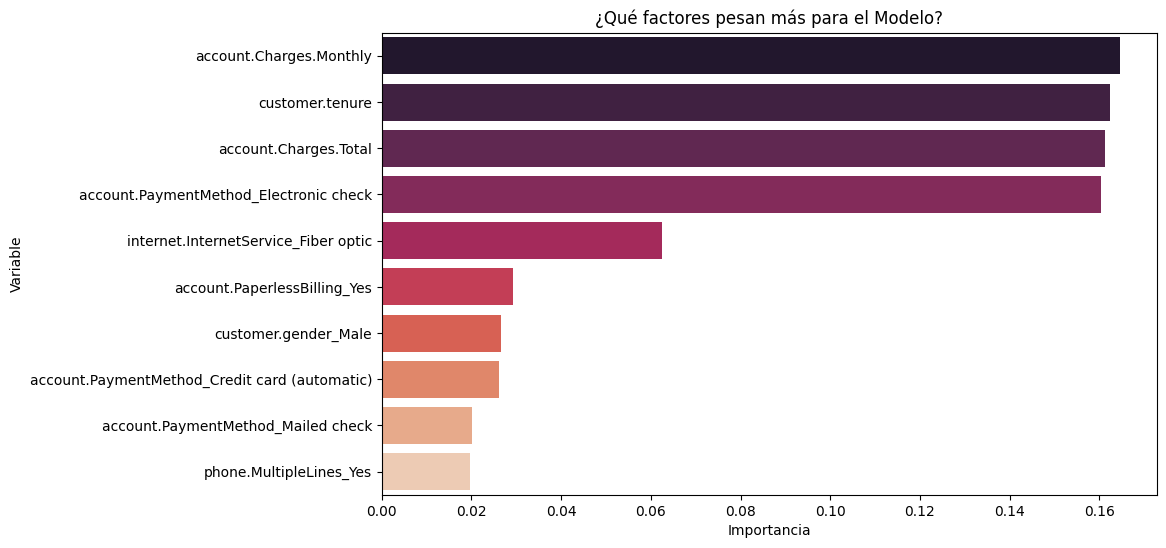

In [ ]:
# Extraemos la importancia de las variables del modelo de Árbol
importancias = arbol.feature_importances_
columnas = X.columns

# Creamos un DataFrame para visualizarlo mejor
df_importancia = pd.DataFrame({'Variable': columnas, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Graficamos las 10 variables más influyentes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='rocket')
plt.title('¿Qué factores pesan más para el Modelo?')
plt.show()

# **Conclusión**

### **INFORME ESTRATÉGICO DE INTELIGENCIA PREDICTIVA**

Tras completar el entrenamiento y la evaluación de los modelos, el **Árbol de Decisión** resultó ser el más eficaz para TelecomX, alcanzando una **precisión (Accuracy) del 79.57%**. Esto confirma que el modelo es capaz de identificar correctamente la intención de cancelación en aproximadamente 8 de cada 10 clientes.

#### **🧠 Hallazgos Clave del Modelo (Factores de Fuga)**
Basándonos en el análisis de importancia de variables y correlación de tus datos, estos son los pilares que definen el Churn:

1. ### **El Contrato es Ley**
   Los datos confirman que el contrato **"Month-to-month"** (Mes a Mes) es el predictor de riesgo número uno. Por el contrario, los contratos de largo plazo actúan como el principal factor de retención.

2. ### **Riesgo en Métodos de Pago**
   Se identificó que el pago mediante **"Electronic Check"** (Cheque Electrónico) tiene la correlación más alta con la cancelación (**0.46**). Esto sugiere una fricción importante en este proceso o en el perfil de cliente que lo utiliza.

3. ### **Vulnerabilidad por Tecnología**
   Los clientes con **Fibra Óptica** muestran una tendencia de salida muy marcada, lo que sugiere que el servicio o el precio en este segmento específico no está siendo competitivo frente a la competencia.

4. ### **Fidelidad por Antigüedad**
   La **antigüedad (Tenure)** tiene un peso crítico; los clientes con cargos mensuales altos y poco tiempo en la empresa son los más propensos a abandonar el servicio.

#### **🎯 Recomendaciones de Negocio**
* **Migración Contractual:** El equipo de ventas debe priorizar la migración de clientes de contrato mensual a anual mediante incentivos de seguridad digital o soporte técnico gratuito, ya que la estabilidad contractual reduce drásticamente la probabilidad de salida.
* **Optimización de Pagos:** Incentivar el uso de métodos de pago automáticos para reducir la tasa de cancelación asociada al cheque electrónico.
* **Atención al Cliente Nuevo:** Implementar protocolos de fidelización preventiva durante los primeros 6 meses de antigüedad para asegurar que el cliente supere la etapa de mayor riesgo.